# Plotting PER run results

In [4]:
import json
import pickle

from matplotlib import pyplot as plt
from smooth import smooth

In [26]:
with open('data/2018-05-15__16--22--35/PER/history.data') as file:
    data = json.load(file)

In [22]:
def plot_timeseries(data, hline_at=100, title=''):
    plt.figure(figsize=(20, 10))
    plt.plot(data, alpha=0.7)
    plt.title(title)
    plt.hlines(hline_at, 0, len(data), linestyles='dotted')
    # plt.legend(list(range(0, len(data))))


# First run

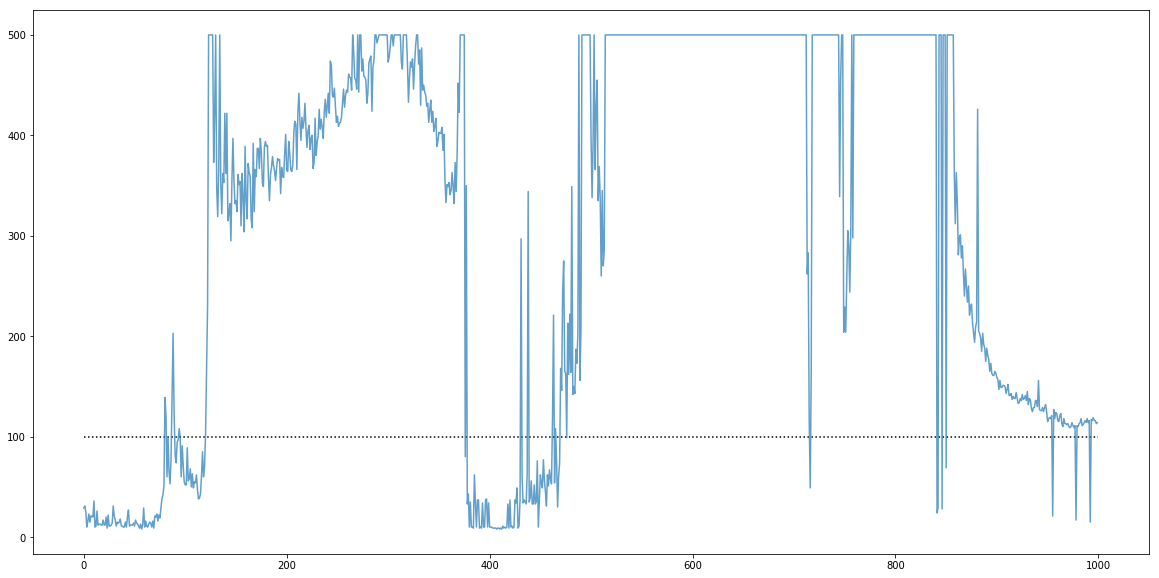

In [27]:
plot_timeseries(data['episode_rewards'])

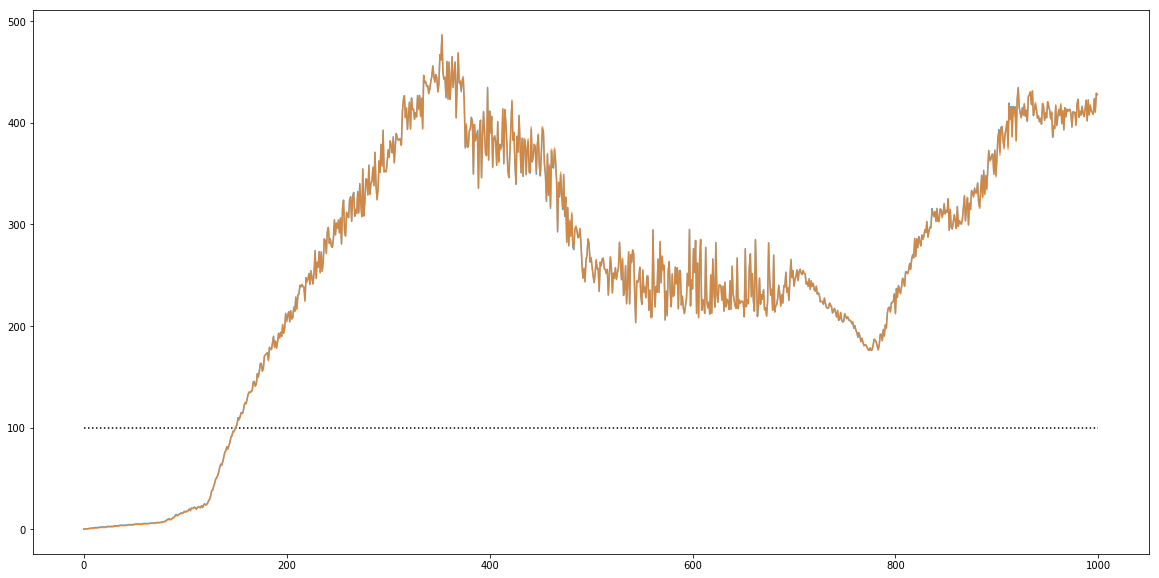

In [28]:
plt.figure(figsize=(20, 10))
plt.plot(data['online_q_history'], alpha=0.7)
plt.plot(data['target_q_history'], alpha=0.7)
plt.hlines(100, 0, len(data['online_q_history']), linestyles='dotted', )


# Second run

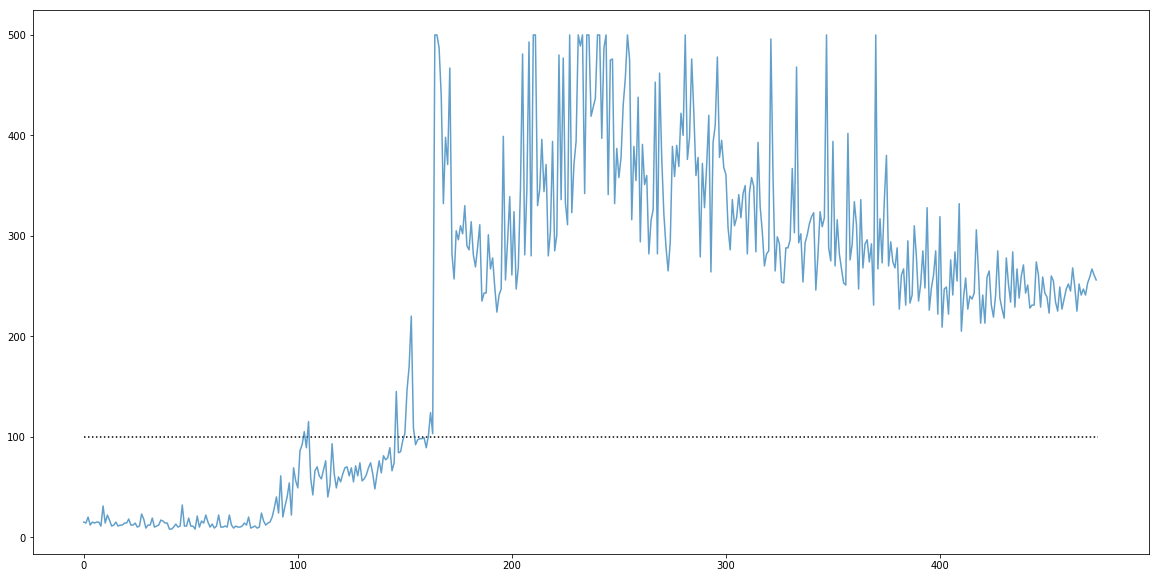

In [30]:
with open('data/2018-05-15__16--47--54/PER/history.data') as file:
    data2 = json.load(file)
    
plot_timeseries(data2['episode_rewards'])

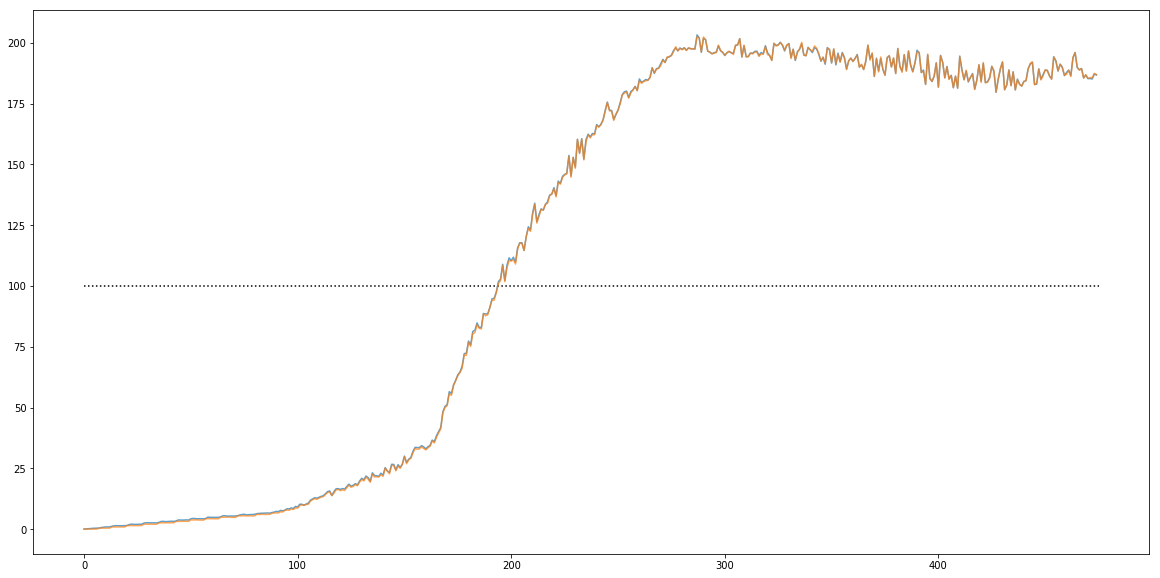

In [31]:
plt.figure(figsize=(20, 10))
plt.plot(data2['online_q_history'], alpha=0.7)
plt.plot(data2['target_q_history'], alpha=0.7)
plt.hlines(100, 0, len(data['online_q_history']), linestyles='dotted', )


# Third run

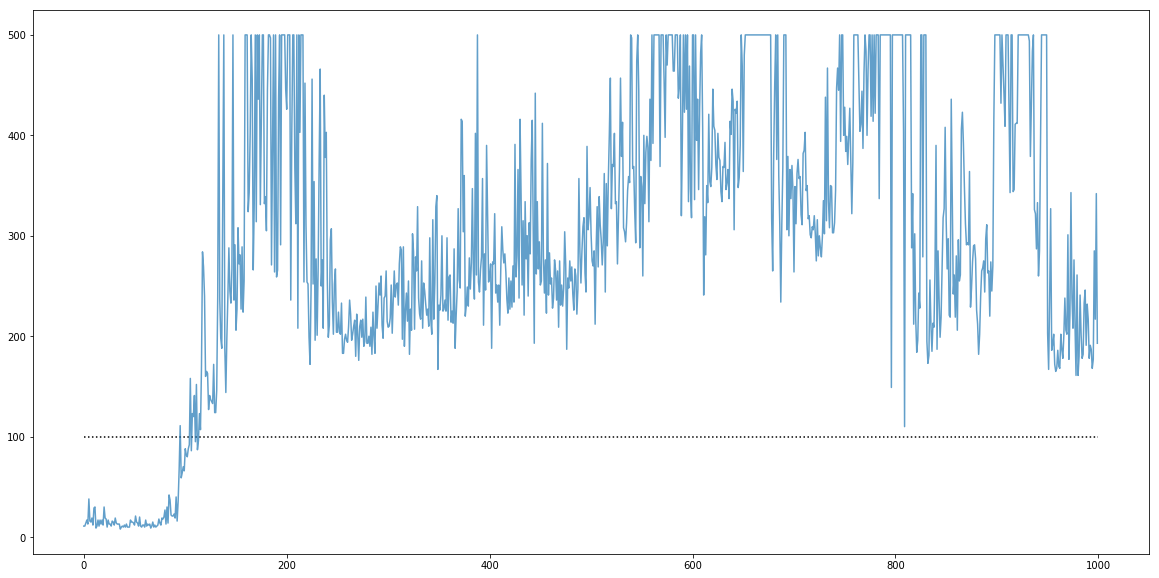

In [35]:
with open('data/2018-05-15__17--12--11/PER/history.data') as file:
    data3 = json.load(file)
    
plot_timeseries(data3['episode_rewards'])

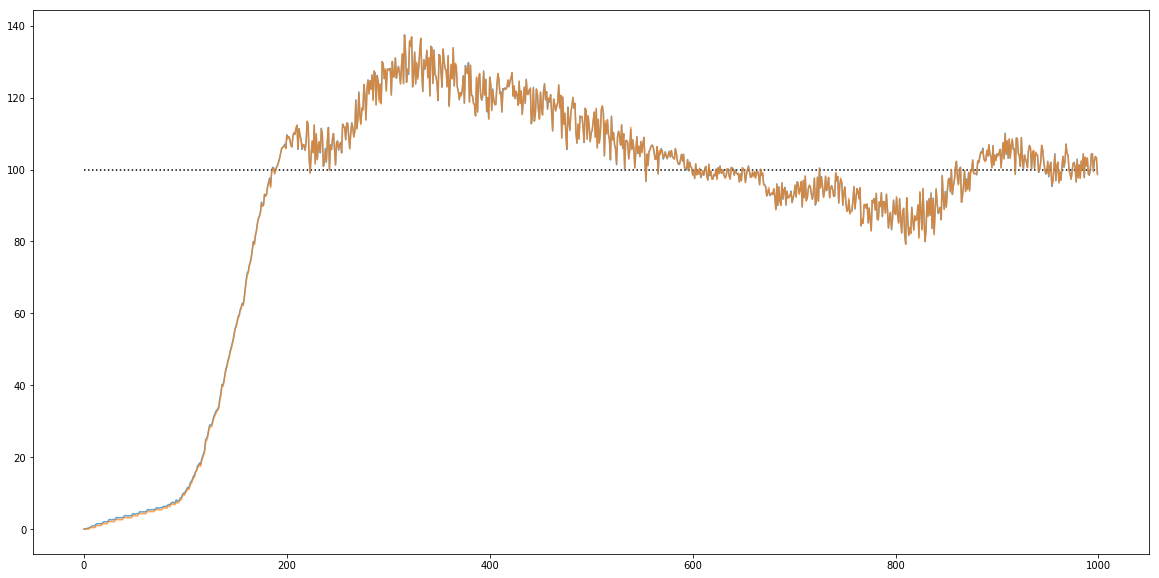

In [36]:
plt.figure(figsize=(20, 10))
plt.plot(data3['online_q_history'], alpha=0.7)
plt.plot(data3['target_q_history'], alpha=0.7)
plt.hlines(100, 0, len(data3['online_q_history']), linestyles='dotted', )


# wot?

why did the first two runs fails to converge? 

---
New runs with `update_target_every=300` and `num_episodes=3000`.

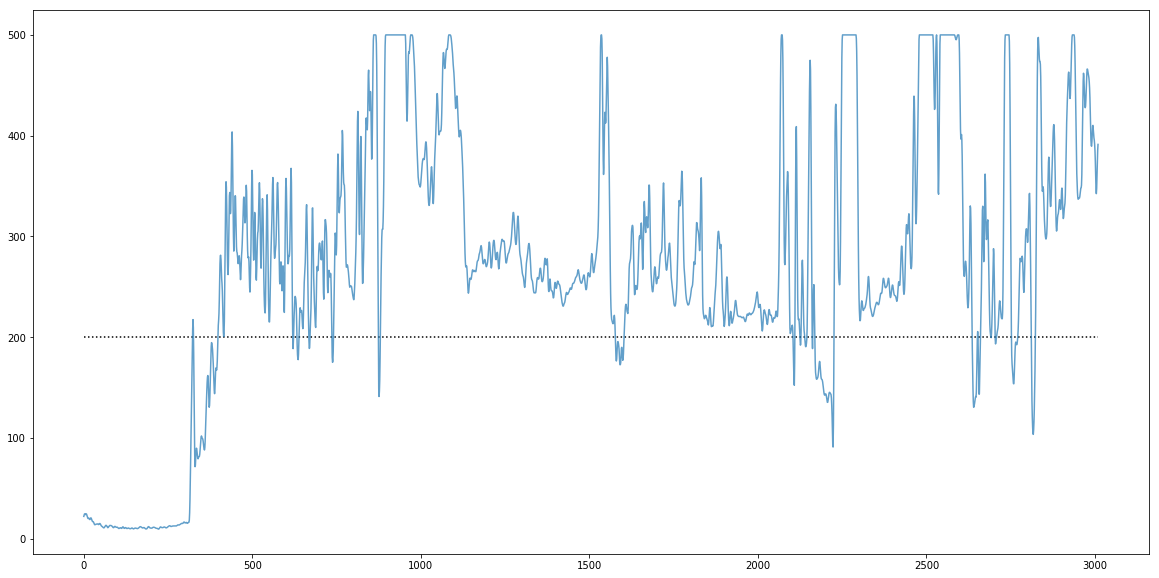

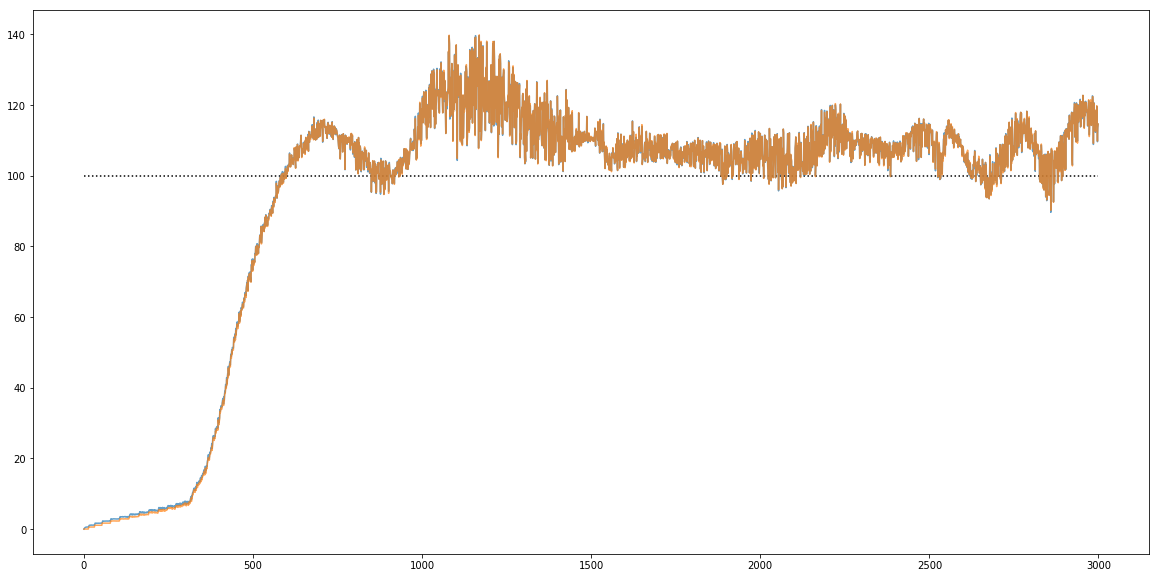

In [62]:
from smooth import smooth

with open('data/2018-05-15__19--10--01/PER/history.data') as file: 
    data4 = json.load(file)
plot_timeseries(smooth(np.array(data4['episode_rewards'])), hline_at=200)
plt.figure(figsize=(20, 10))
plt.plot(data4['online_q_history'], alpha=0.7)
plt.plot(data4['target_q_history'], alpha=0.7)
plt.hlines(100, 0, len(data4['online_q_history']), linestyles='dotted', )

In [66]:
cut = 600
print(sum(data4['episode_rewards'][cut:])/len(data4['episode_rewards'][cut:]))
print(len(data4['episode_rewards'][cut:]))

309.59458333333333
2400


300.367


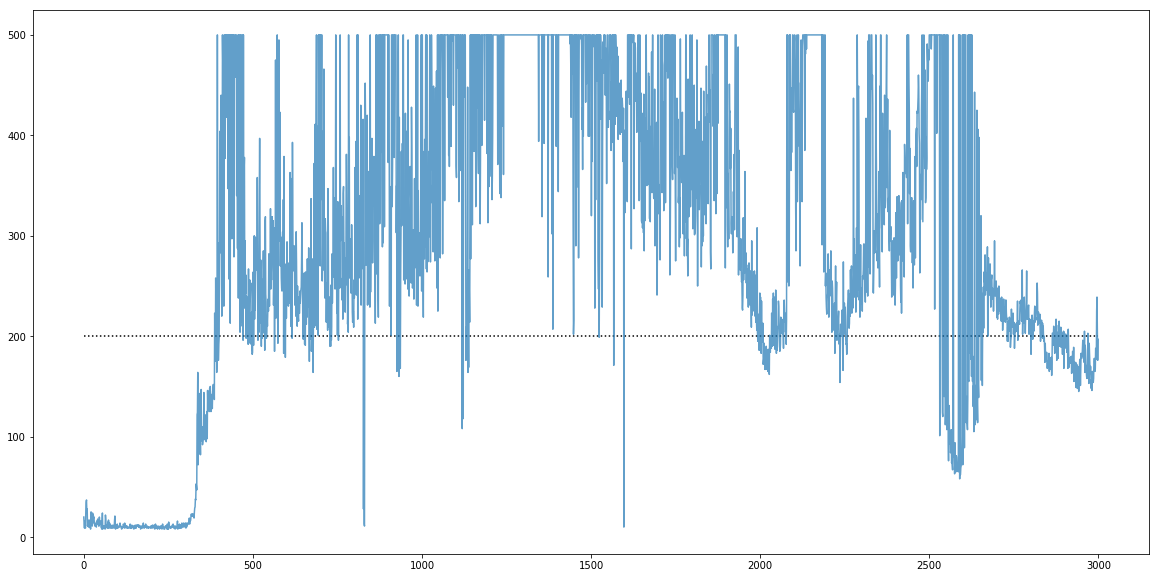

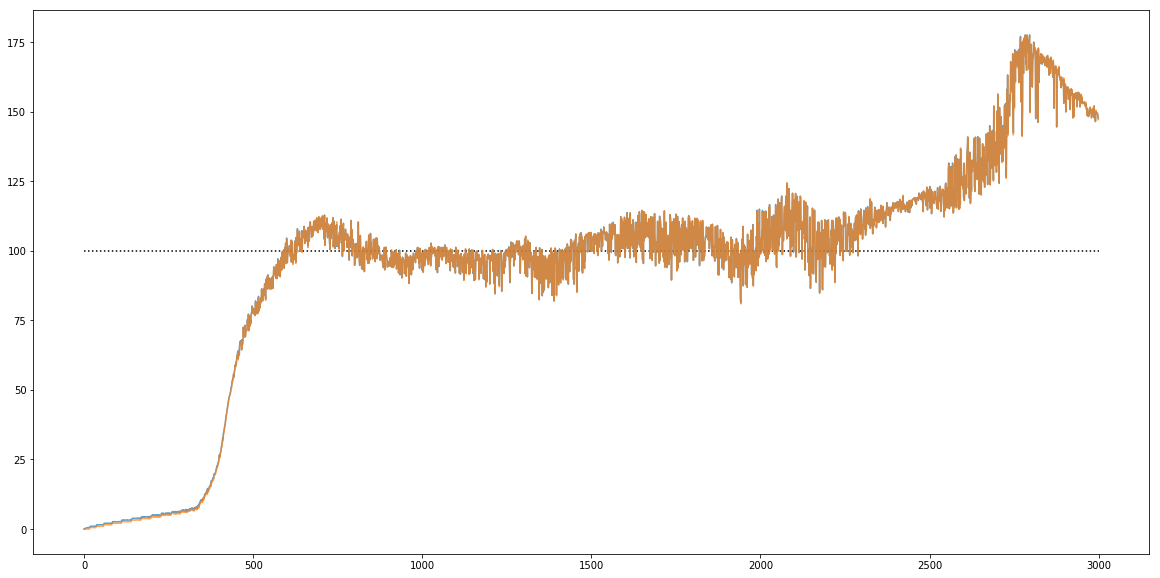

In [74]:
with open('data/2018-05-15__20--31--32/PER/history.data') as file: 
    run5 = json.load(file)
    
episode5_rewards = np.array(run5['episode_rewards'])
episode5_online_q = run5['online_q_history']
episode5_target_q = run5['target_q_history']

plot_timeseries(episode5_rewards, hline_at=200)

plt.figure(figsize=(20, 10))
plt.plot(episode5_online_q, alpha=0.7)
plt.plot(episode5_target_q, alpha=0.7)
plt.hlines(100, 0, len(episode5_target_q), linestyles='dotted', )
print(sum(episode5_rewards)/len(episode5_rewards))

# Effect of memory size on performance

Average reward: 242.563


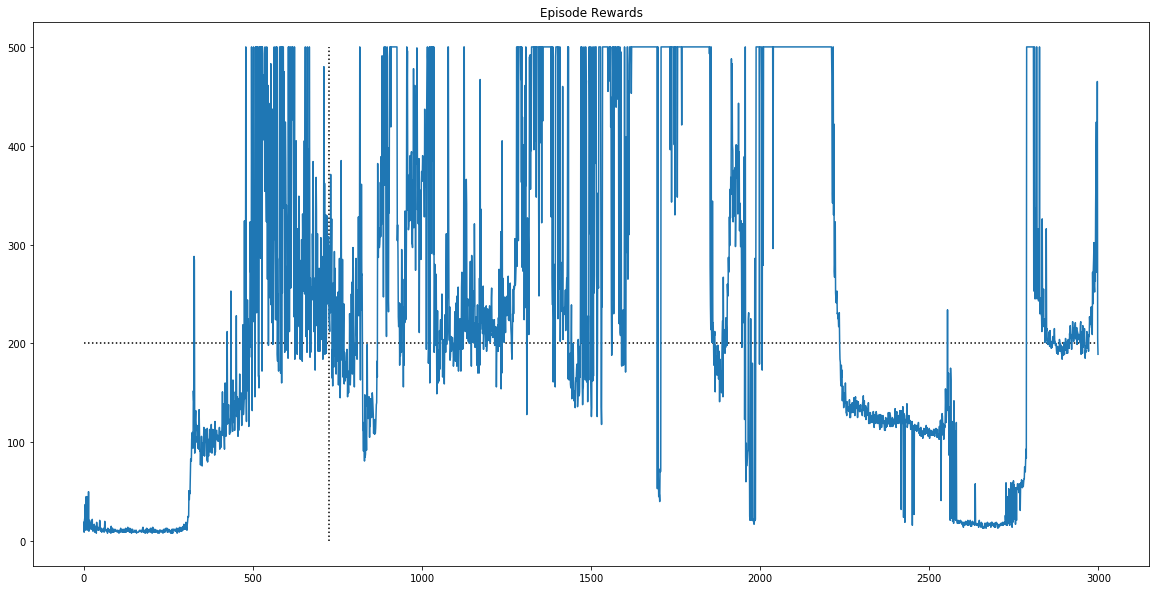

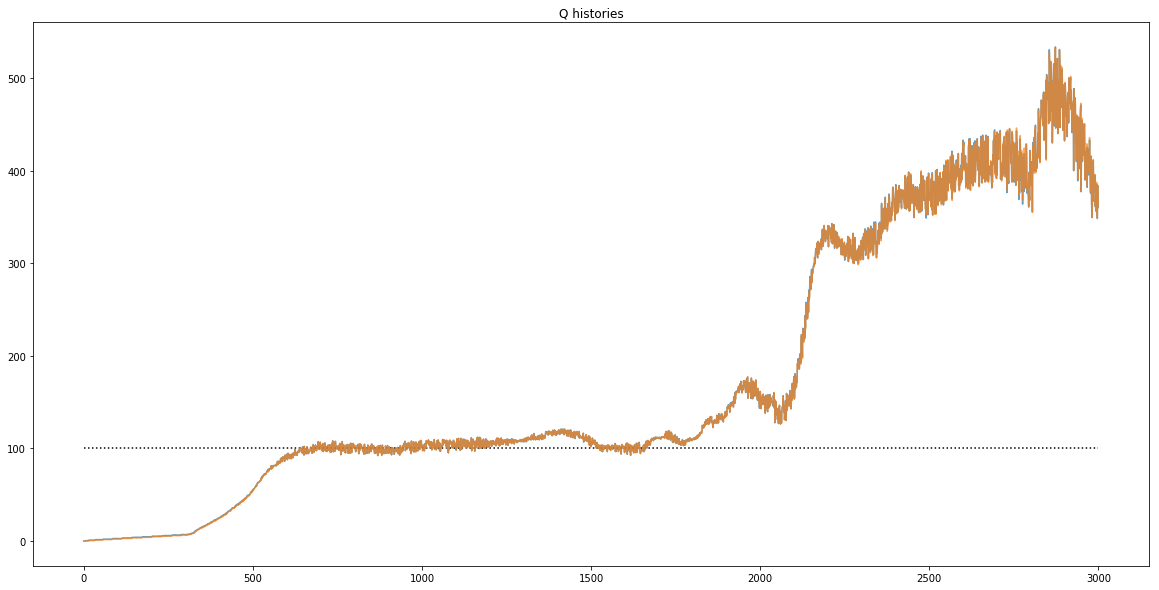

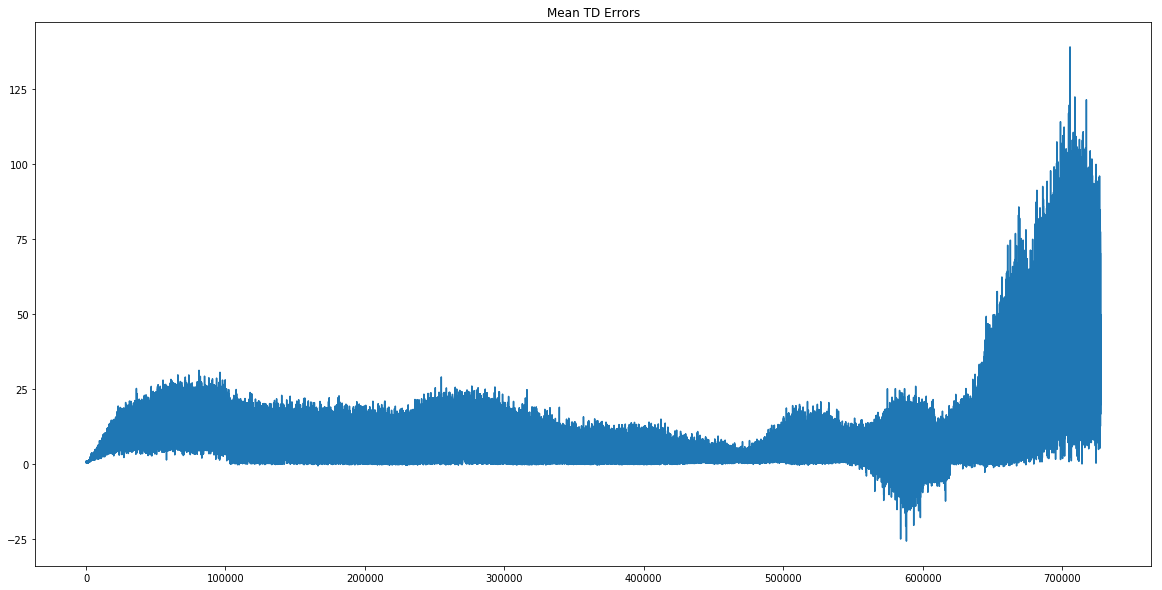

In [59]:
def plot_run(data_path, agent_path):
    with open(data_path) as file: 
        run = json.load(file)

    # Plot episode rewards + verticl cut line where the memory gets filled.
    episode_rewards = np.array(run['episode_rewards'])
    episode_online_q = run['online_q_history']
    episode_target_q = run['target_q_history']
    plt.figure(figsize=(20, 10))
    plt.plot(episode_rewards)
    plt.title('Episode Rewards')
    plt.hlines(200, 0, len(episode_rewards), linestyles='dotted')

    with open(agent_path, 'rb') as agent_file:
        agent = pickle.load(agent_file)
    transitions_per_episode = run['transitions_per_episode']        
    transition_total = 0
    episodes = 0
    for transitions in transitions_per_episode:
        transition_total += transitions
        episodes += 1
        if transition_total > agent['memory_size']:
            plt.vlines(episodes, 0, 500, linestyles='dotted')
            break    
    # Plot Q histories
    plt.figure(figsize=(20, 10))
    plt.plot(episode_online_q, alpha=0.7)
    plt.plot(episode_target_q, alpha=0.7)
    plt.hlines(100, 0, len(episode_target_q), linestyles='dotted', )
    plt.title('Q histories')
    print(f'Average reward: {sum(episode_rewards)/len(episode_rewards)}')   
    if 'mean_td_errors' in run:
        plt.figure(figsize=(20, 10))        
        plt.plot(run['mean_td_errors'])
        plt.title('Mean TD Errors')


plot_run('data/2018-05-16__08--51--12/PER/history.data', 'data/2018-05-16__08--51--12/PER/CartPole-v1_agent.params')

## First run without memory cap:

Average reward: 202.59


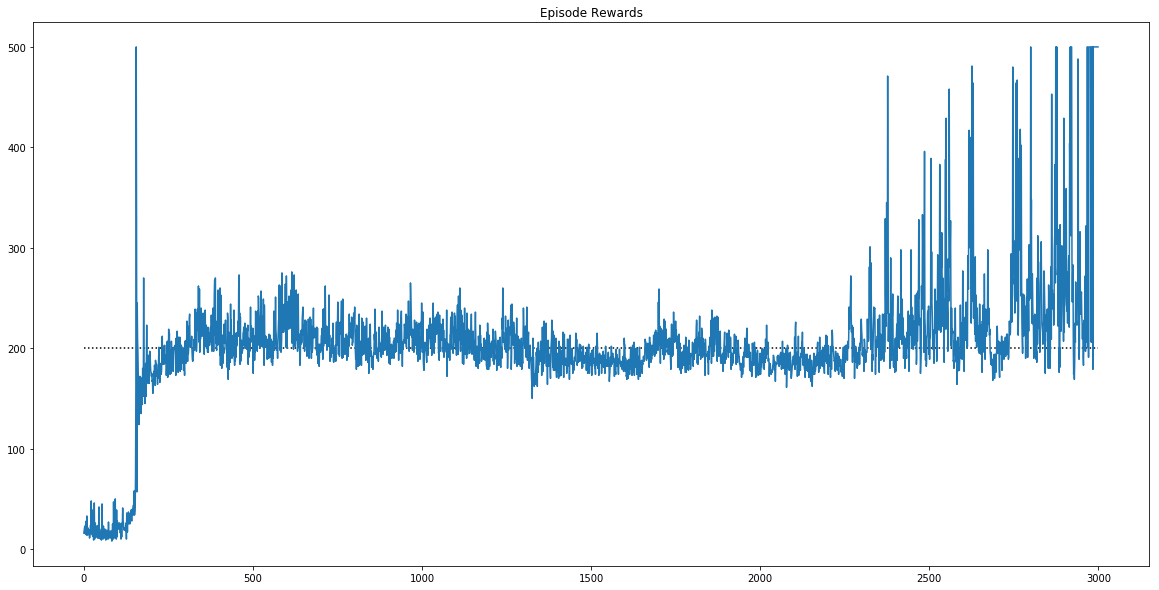

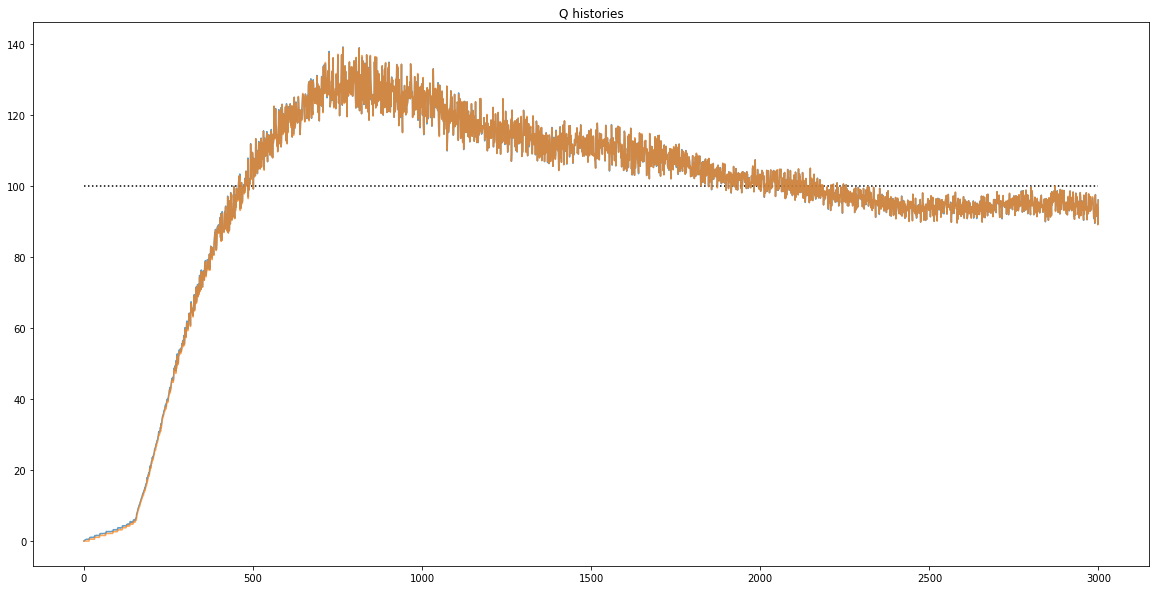

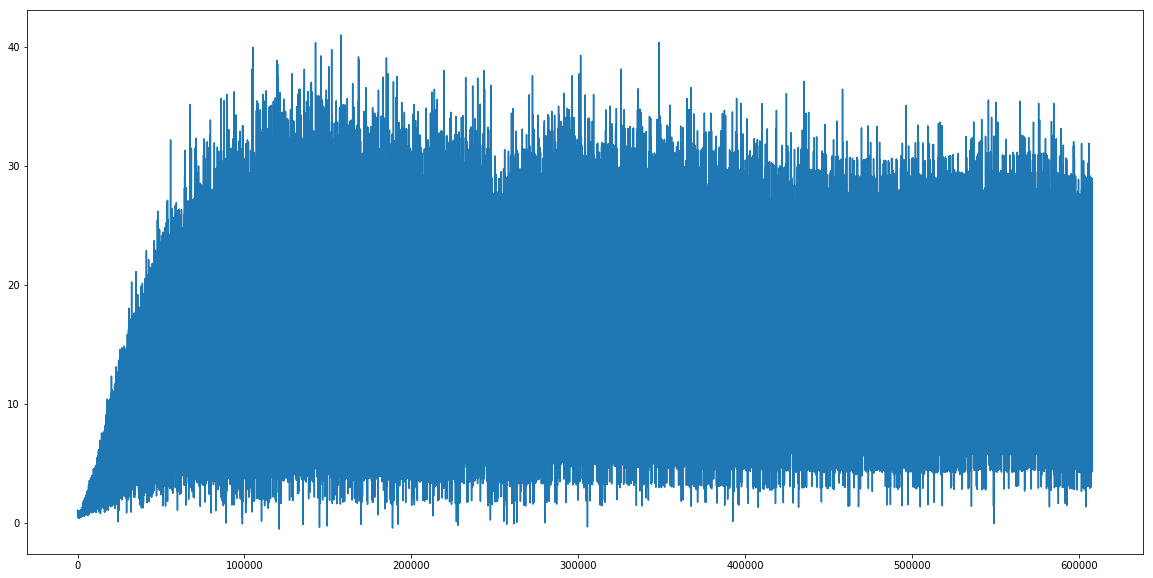

In [50]:
plot_run('data/2018-05-16__10--13--32/PER/history.data', 'data/2018-05-16__10--13--32/PER/CartPole-v1_agent.params')


## Larger memory + default num episodes and default target network update freq

### Run 1

Average reward: 316.801


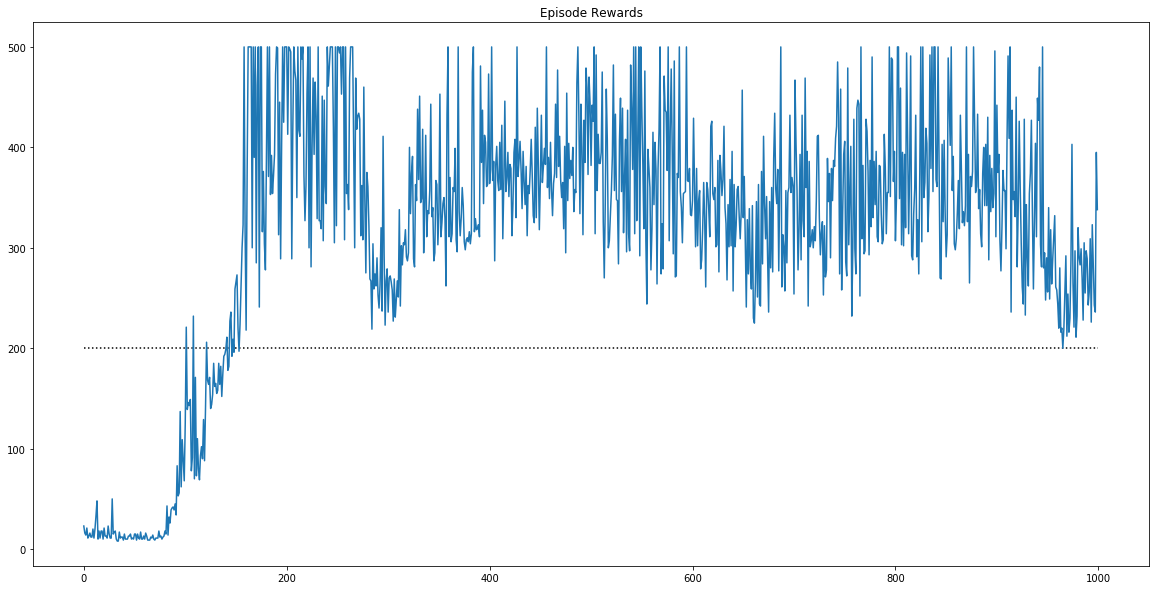

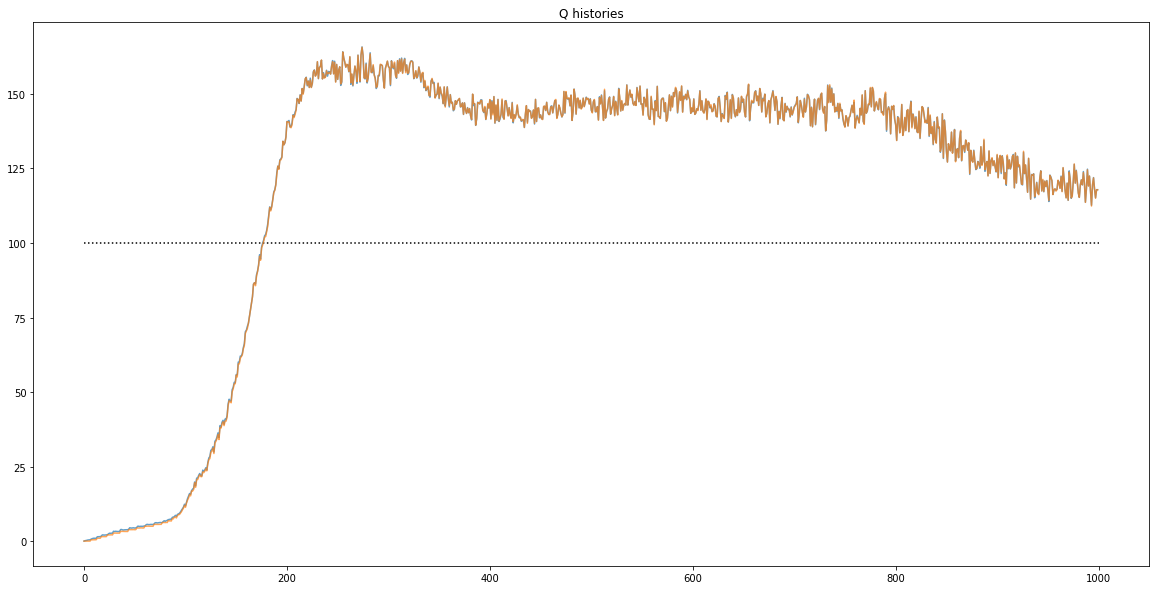

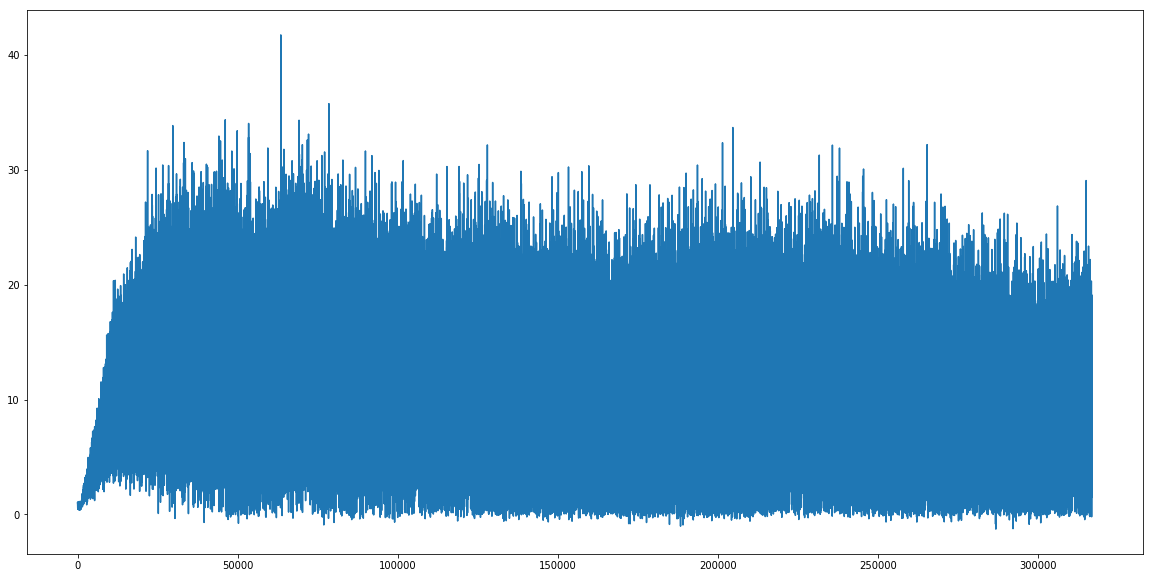

In [51]:
plot_run('data/2018-05-16__11--33--13/PER/history.data', 'data/2018-05-16__11--33--13/PER/CartPole-v1_agent.params')


## Run 2

Average reward: 364.45433333333335


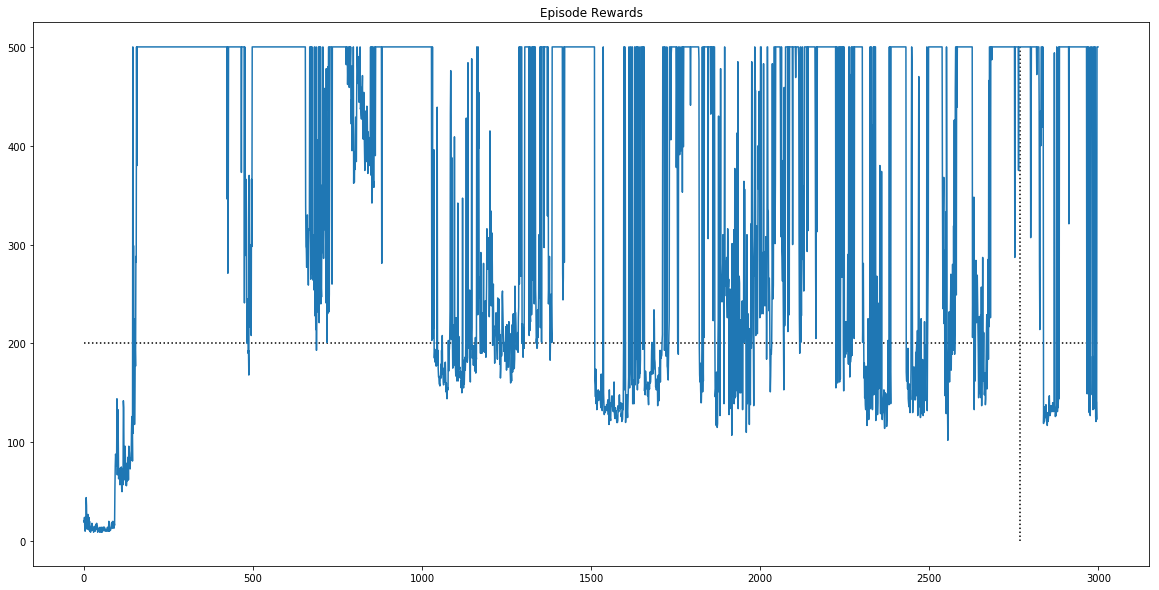

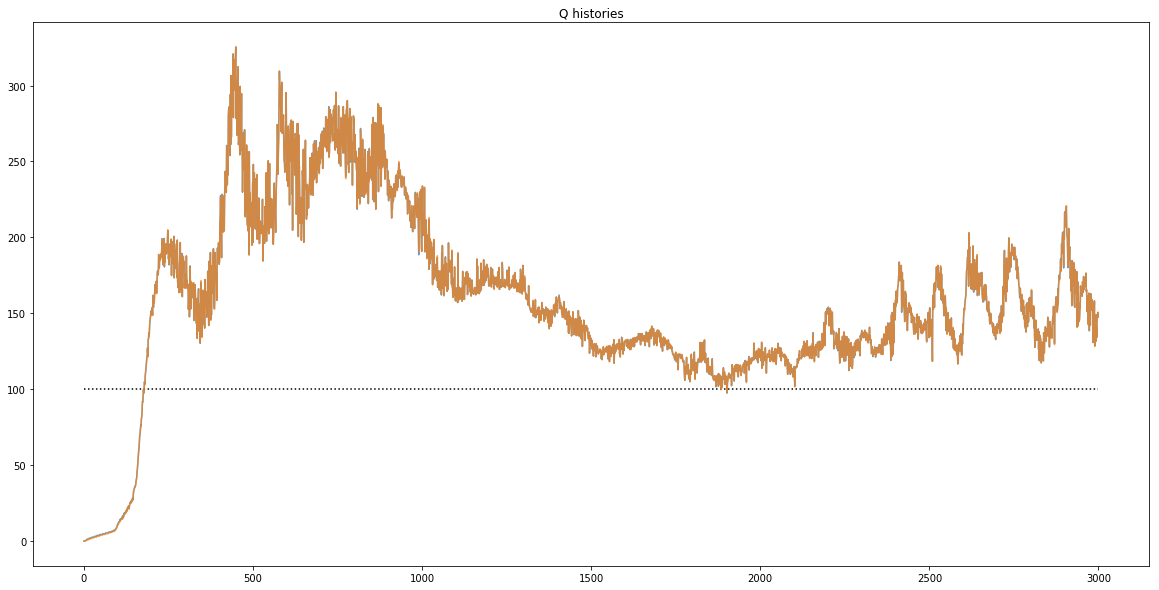

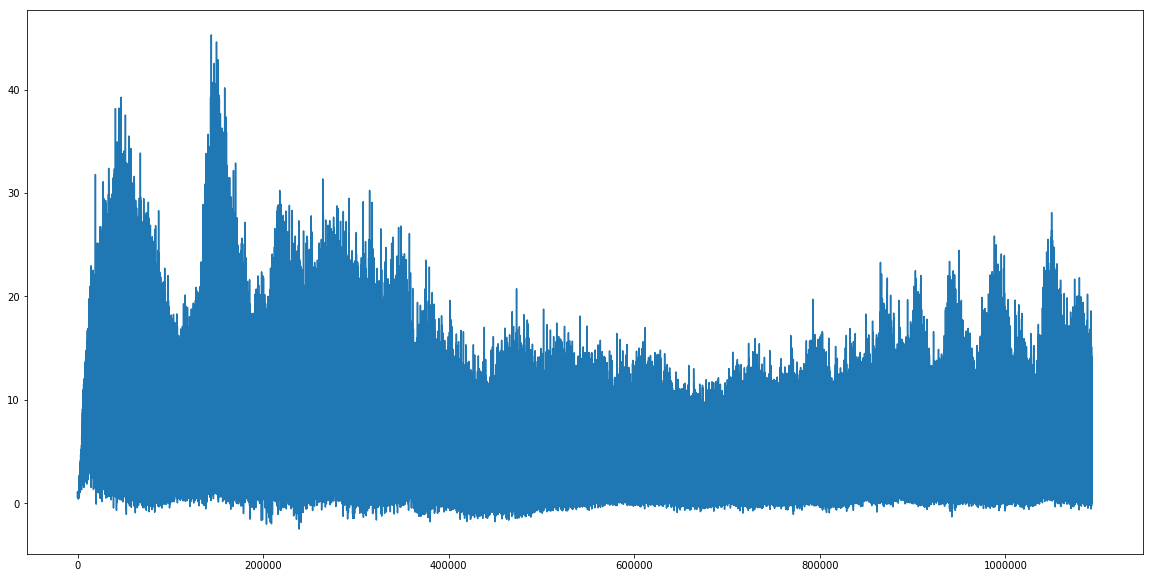

In [56]:
plot_run('data/2018-05-16__12--22--13/PER/history.data', 'data/2018-05-16__12--22--13/PER/CartPole-v1_agent.params')


# Using Importance Sampling weights:

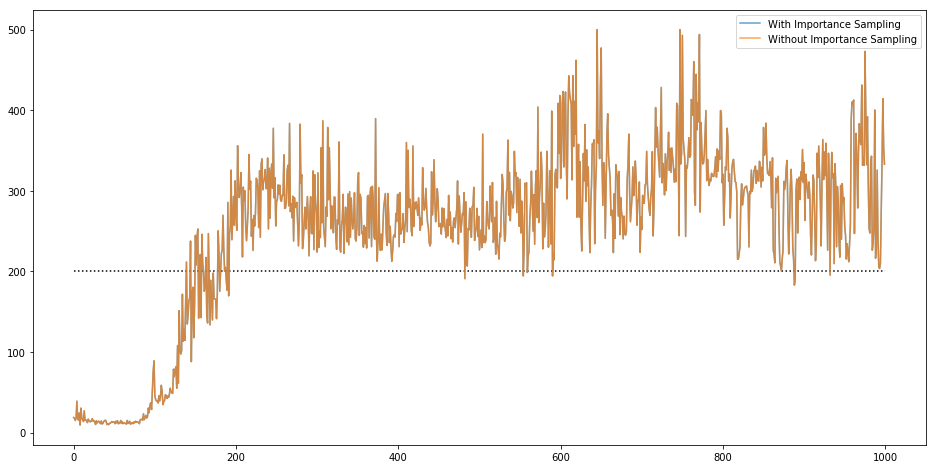

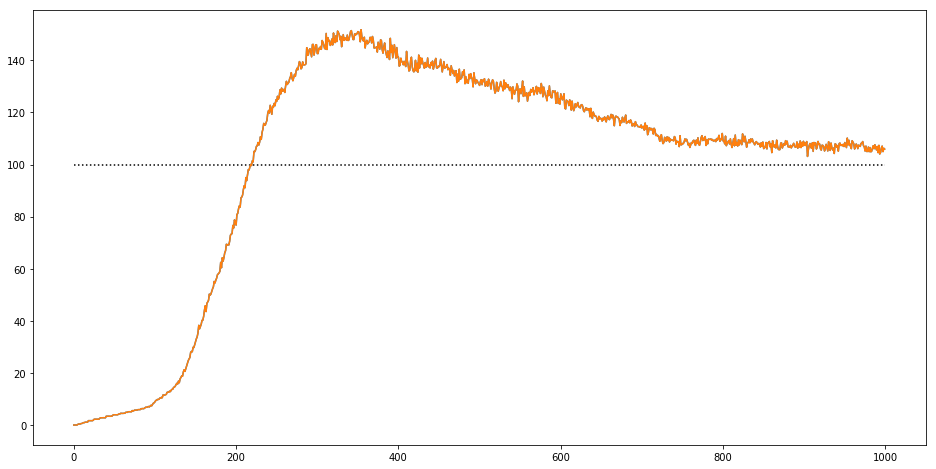

In [104]:
importance_sampling_paths = [
    'data/2018-05-17__15--31--18/PER/history.data',
    'data/2018-05-17__15--48--44/PER/history.data',
    'data/2018-05-17__16--02--58/PER/history.data',
]

no_importance_sampling_paths = [
    'data/2018-05-17__17--52--33/PER/history.data',
    'data/2018-05-17__18--19--01/PER/history.data',
    'data/2018-05-17__18--36--50/PER/history.data',
]

def average_series(series_set):
    return sum(series_set)/len(series_set)

def get_data_series(paths, series_name):
    out = []
    for path in data_paths:
        with open(path) as file:
            run = json.load(file)
        out.append(np.array(run[series_name]))
    return out

is_episode_rewards = get_data_series(importance_sampling_paths, 'episode_rewards')
avg_is_episode_reward = average_series(is_episode_rewards)

no_is_episode_rewards = get_data_series(no_importance_sampling_paths, 'episode_rewards')
avg_no_is_episode_rewards = average_series(no_is_episode_rewards)

is_q_histories = get_data_series(importance_sampling_paths, 'target_q_history')
avg_is_q_histories = average_series(is_q_histories)

no_is_q_histories = get_data_series(no_importance_sampling_paths, 'target_q_history')
avg_no_is_q_histories = average_series(no_is_q_histories)

plt.figure(figsize=(16, 8))
plt.plot(avg_is_episode_reward, alpha=0.7)
plt.plot(avg_no_is_episode_rewards, alpha=0.7)
plt.legend(['With Importance Sampling', 'Without Importance Sampling'])
plt.hlines(200, 0, len(avg_is_episode_reward), linestyles='dotted')

plt.figure(figsize=(16, 8))
plt.plot(avg_is_q_histories)
plt.plot(avg_no_is_q_histories)
plt.hlines(100, 0, len(avg_no_is_q_histories), linestyles='dotted')

def plot_rewards_q_histories(data_paths):
    rewards_plot =plt.figure(figsize=(14, 7))
    average_reward = []
    average_qs = []    
    for path in data_paths:
        with open(path) as file:
            run = json.load(file)
        episode_rewards = np.array(run['episode_rewards'])
        average_reward.append(episode_rewards)
        average_qs.append(np.array(run['target_q_history']))

    plt.plot(sum(average_reward)/len(average_reward))
    plt.title('Average Episode Rewards')
    plt.hlines(200, 0, len(episode_rewards), linestyles='dotted')
    
    plt.figure(figsize=(20, 10))
    plt.plot(sum(average_qs)/len(average_qs))
    plt.title('Average Q Histories')
    plt.hlines(100, 0, len(episode_rewards), linestyles='dotted')    

# plot_rewards_q_histories(data_paths)

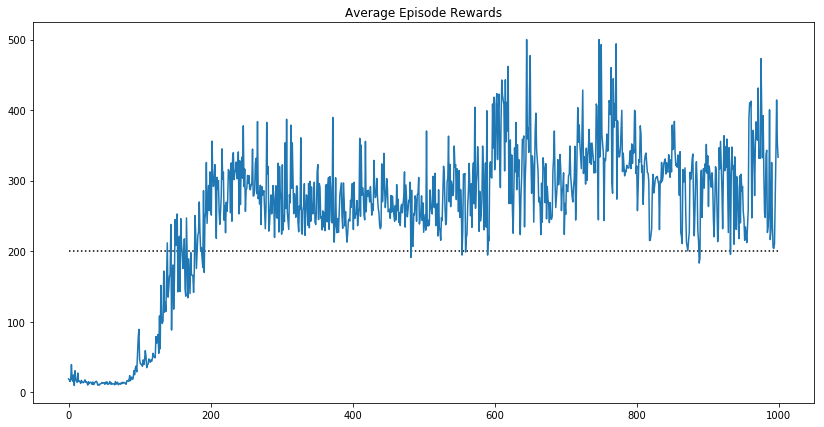

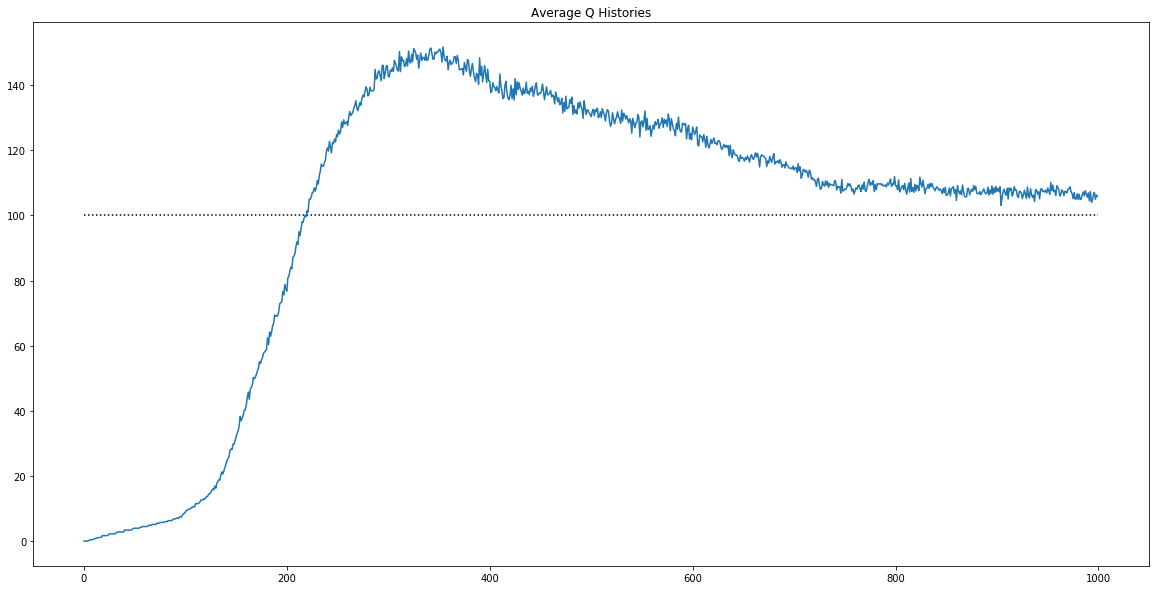

In [100]:
plot_rewards_q_histories(importance_sampling_paths)

# Without Importance Sampling Weights

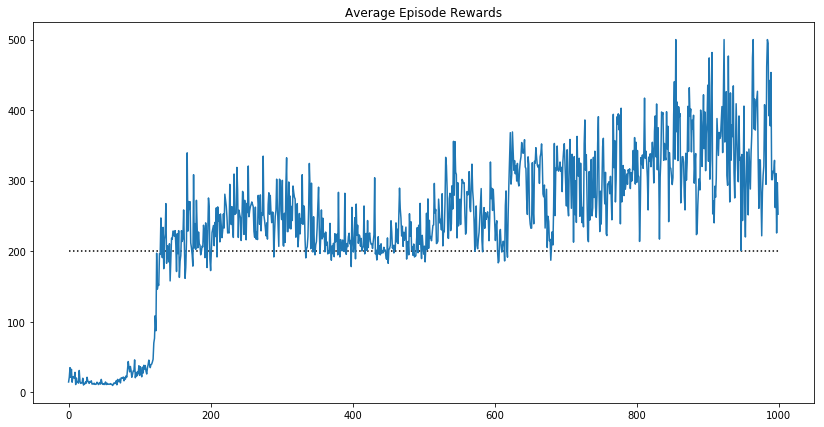

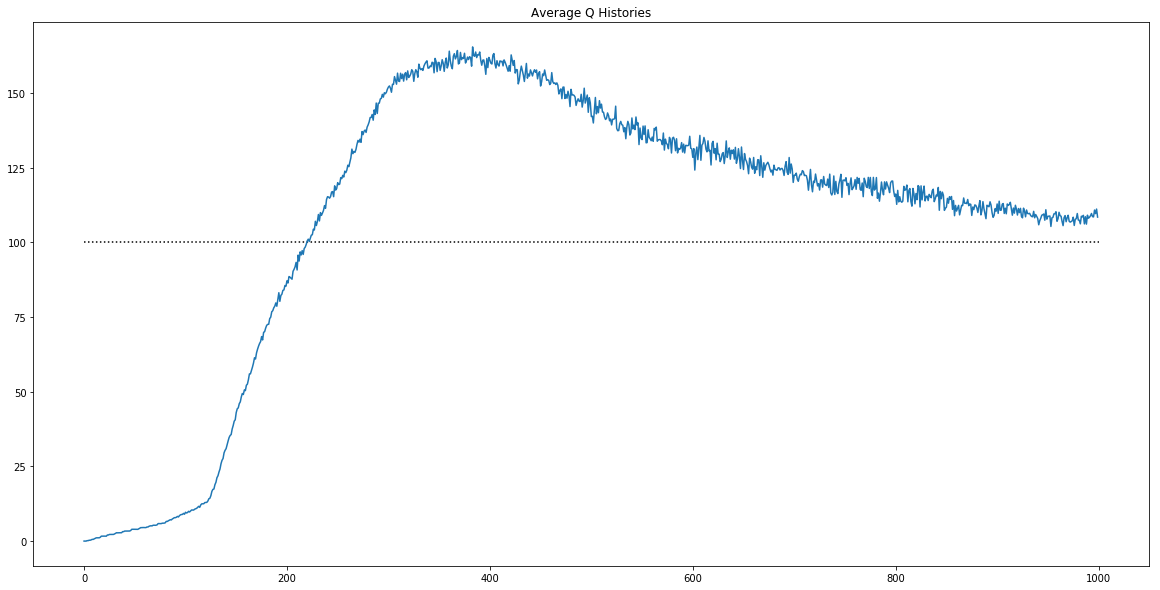

In [99]:
data_paths2 = ['data/2018-05-17__17--52--33/PER/history.data',
'data/2018-05-17__18--19--01/PER/history.data',
'data/2018-05-17__18--36--50/PER/history.data',]

plot_rewards_q_histories(data_paths2)